# 2A-L4 Filters as templates

## Find template 1D

In [1]:
import numpy as np
from scipy.signal import correlate

def find_template_1D(t, s):
    t = t - t.mean()
    s = s - s.mean()
    return np.argmax(correlate(s, t, mode='valid'))

s = np.array([-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1])
t = np.array([1, 1, 0, -1])
find_template_1D(t, s)

4

## Find Template 2D

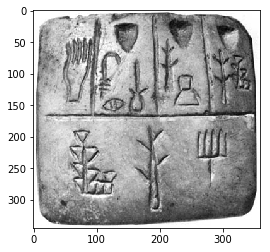

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

tablet = cv2.imread('./images/tablet.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(tablet, cmap='gray');

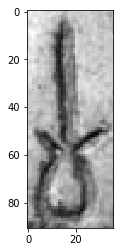

In [3]:
glyph = tablet[74:165, 149:185];
plt.imshow(glyph, cmap='gray');

In [4]:
from scipy.signal import correlate2d

def find_template_2D(t, s):
    t = t - t.mean()
    s = s - s.mean()
    c = correlate2d(s, t, mode='same')
    x, y = np.unravel_index(np.argmax(c), c.shape)
    return x - t.shape[0] // 2, y - t.shape[1] // 2

x, y = find_template_2D(glyph, tablet)
print((x, y))

(74, 148)


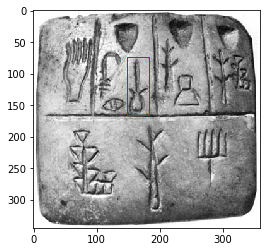

In [5]:
import matplotlib.patches as patches

fig, ax = plt.subplots(1)
ax.imshow(tablet, cmap='gray');

rect = patches.Rectangle((y, x), glyph.shape[1], glyph.shape[0], linewidth=1, edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()